# Patrick Adams
## ML Assignment 4

In [30]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [4]:
import keras
from keras.datasets import mnist

In [5]:
np.random.seed(2023)

### Preprocessing the Data: 

In [6]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


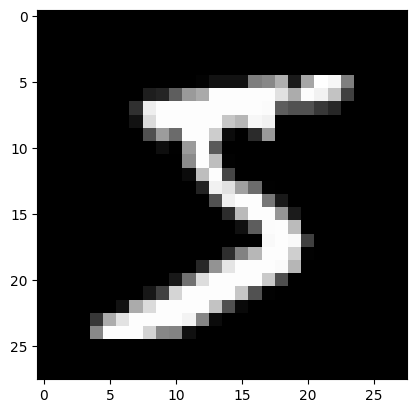

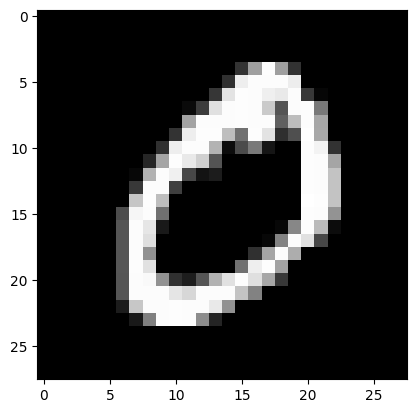

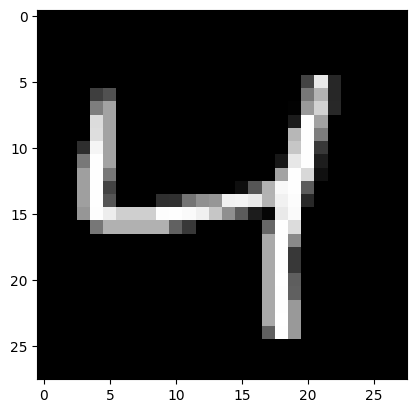

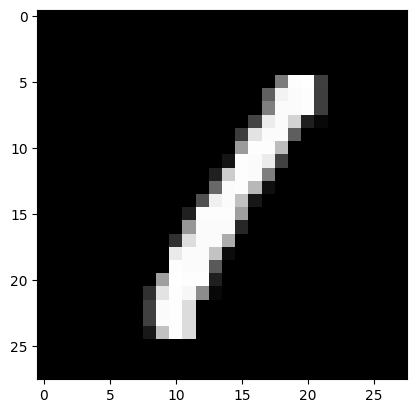

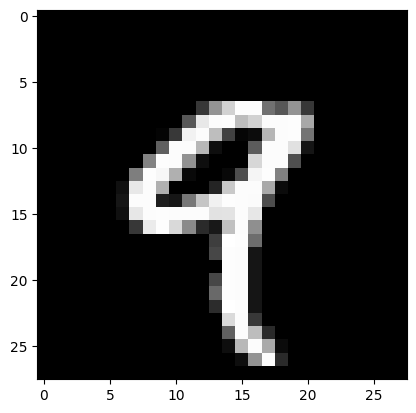

In [7]:
# Visualize the first 5 images in x_train
for i in range(5):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

In [8]:
# Flatten the inputs and convert the datatype to float
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')

In [9]:
# Normalize the ranges of values
x_train /= 255
x_test /= 255

# Verify the final shapes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


### Training a Random Forest Model:

In [10]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=2023)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=2023)

In [11]:
# Evaluate the performance on the test set
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.969


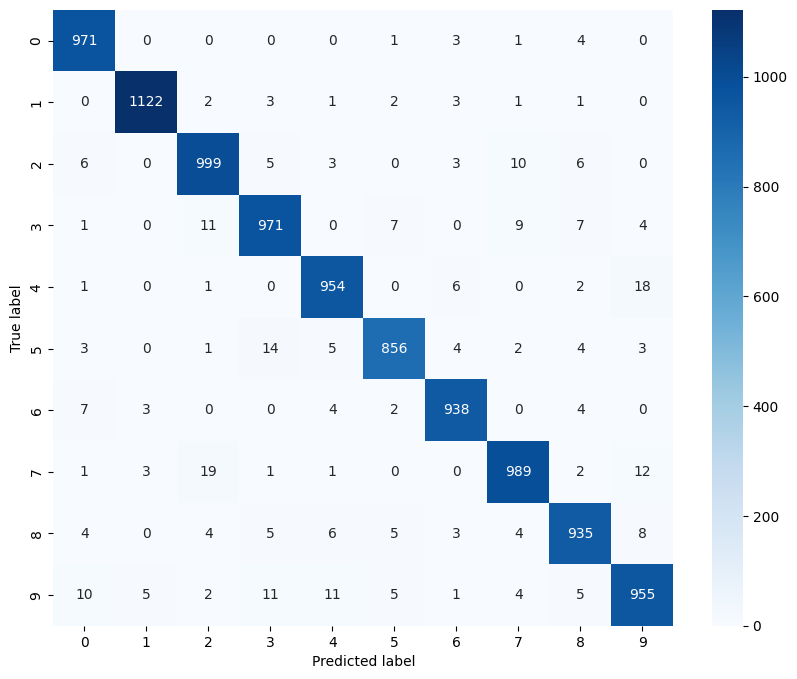

In [12]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Using GridSearch to find best parameters and increase accuracy if possible:

In [13]:
# This Random Forest Classifier is already above the basleine accuray of 96%, but let's use a GridSearch to see if we can increase the accuracy any more

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
}

In [ ]:
# Training the model using GridSearchCV
rf = RandomForestClassifier(random_state=2023)
grid_search = GridSearchCV(rf, param_grid, cv=3)
grid_search.fit(x_train, y_train)

In [16]:
# Evaluate the performance on the test set
y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9706


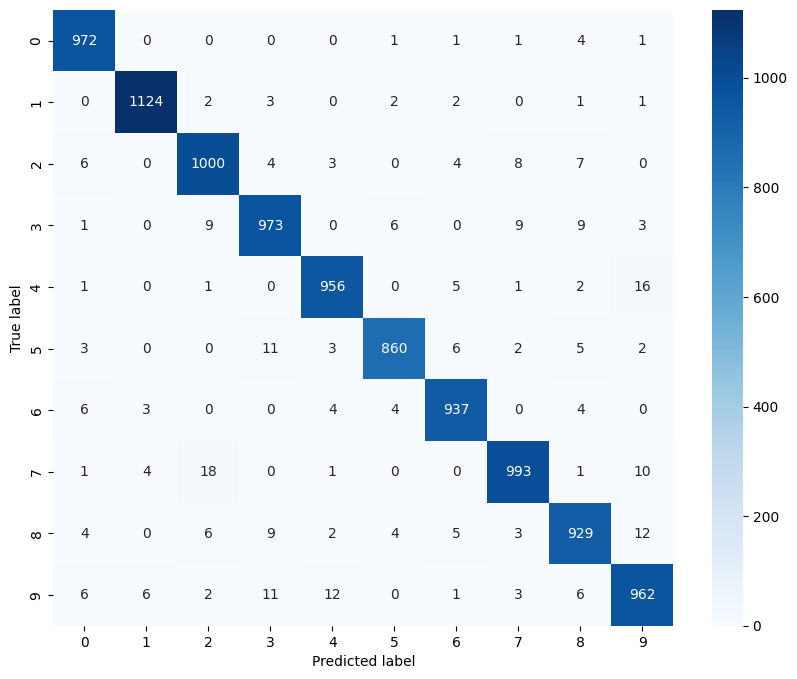

In [17]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [18]:
# Printing the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 30, 'n_estimators': 300}


### Training and KNN Model to see how it performs in comparison to the Random Forest Model:

In [19]:
# Lets now try to use KNN to see how well it performs at image classifying 

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

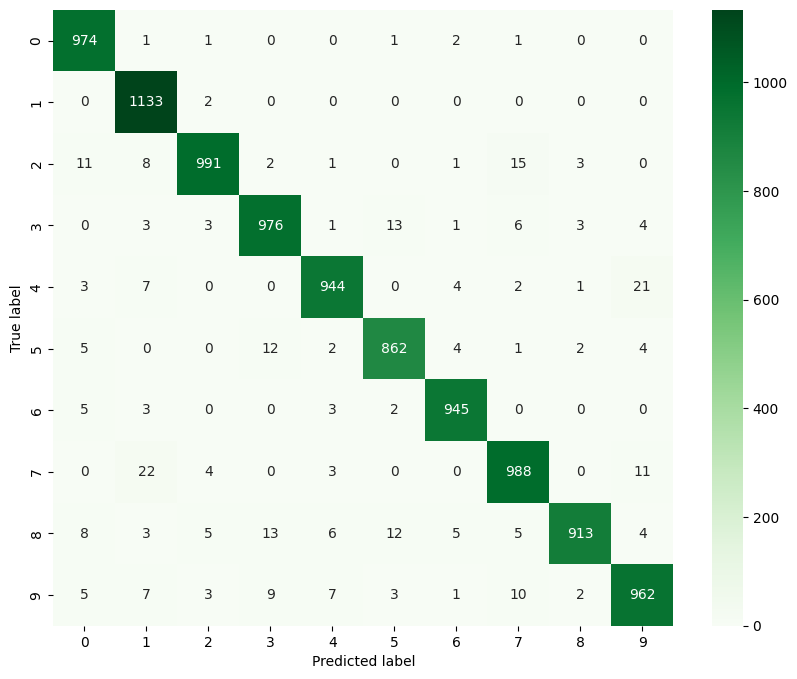

Accuracy: 0.9688


In [22]:
# Evaluating the performance
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print('Accuracy:', accuracy)


### Using GridSearch to find best parameters:

In [23]:
#  Hyperparameter tuning using GridSearchCV
params = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(knn, params, cv=3)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})

In [26]:
# Evaluating the performance
y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9705


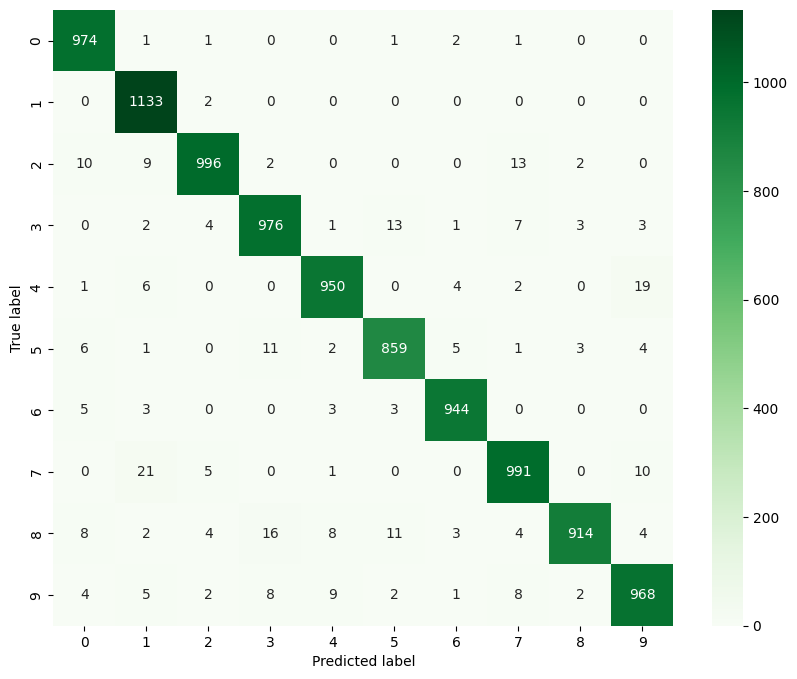

Accuracy: 0.9705


In [29]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print('Accuracy:', accuracy)

In [28]:
# Pritning the best parameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'n_neighbors': 3}


### Lastly, trying SVM to compare to the previous two models:

In [37]:
# The last model we will try is SVM
svm = SVC(C=1, random_state=2023)
svm.fit(x_train, y_train)

SVC(C=1, random_state=2023)

In [38]:
# Evaluate model performance
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9792


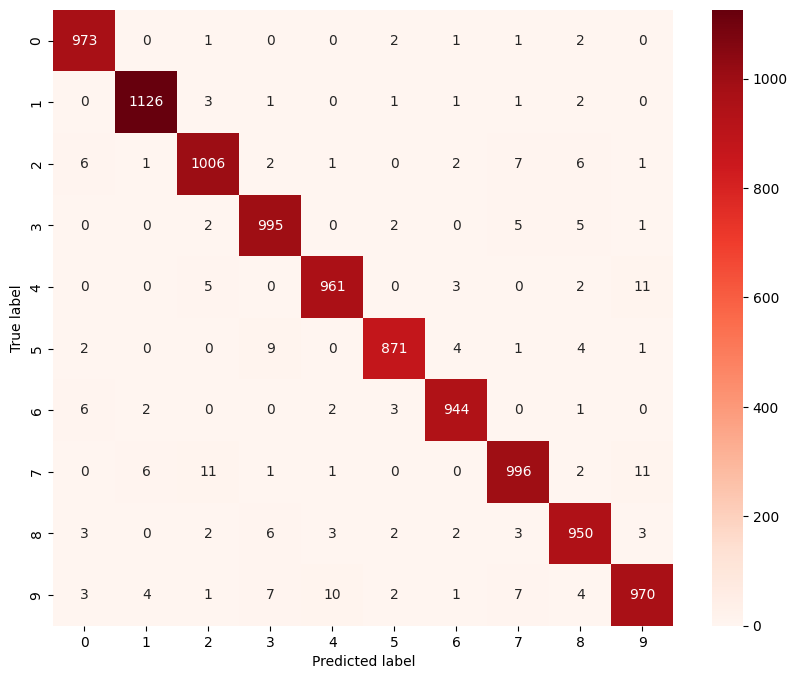

Accuracy: 0.9792


In [39]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print('Accuracy:', accuracy)

# Analysis:

### The model that give the best accuracy was SVM. Even after hypertuning both the Random Forest classifier and KNN classifier, the default SVM with a 'C' of 1 presented a higher accuracy. Changing the 'C' parameter to 0.1 resulted in a decrease of accuracy to about 95.5% which is below baseline. With that being said, the default SVM model seems to out classify the other two and has performed the best in this problem.